### Установка и импорт библиотек

In [1]:
!pip install opencv-python --break-system-packages
!pip install matplotlib --break-system-packages
import cv2
import numpy as np
from matplotlib import pyplot as plt

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip


### Исходное изображение

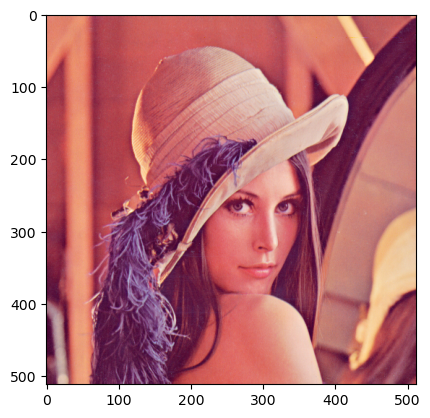

In [2]:
def read_img():
    test_img = cv2.imread('Lenna.png')
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    return test_img

test_img = read_img()
plt.imshow(test_img)

### 1. Найти все orb features точки на изображении

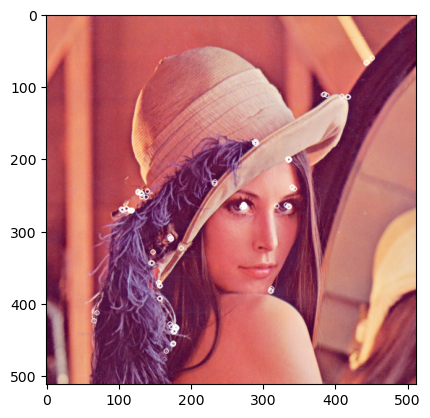

In [54]:
test_img = read_img()
orb = cv2.ORB_create(nfeatures=100)
keypoints = orb.detect(test_img, None)
keypoints, _ = orb.compute(test_img, keypoints)
result = cv2.drawKeypoints(test_img, keypoints, None, color=(255,255,255), flags=0)
plt.imshow(result)

### 2. Найти все sift features точки на изображении

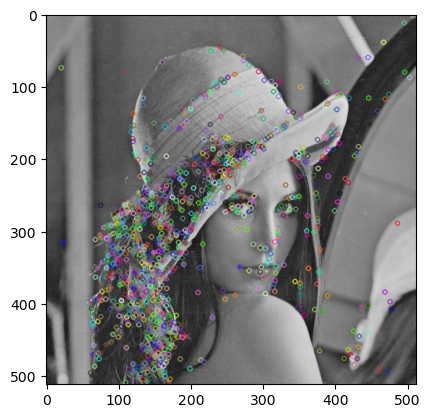

In [20]:
test_img = read_img()
sift = cv2.SIFT_create()
gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
keypoints = sift.detect(gray, None)
result = cv2.drawKeypoints(gray, keypoints, test_img)
plt.imshow(result)

### 3. Найти canny edges на изображенни

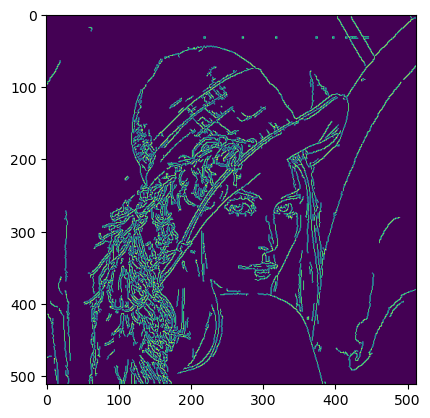

In [16]:
test_img = read_img()
result = cv2.Canny(test_img, 100, 200)
plt.imshow(result)

### 4. Перевести изображение в grayscale

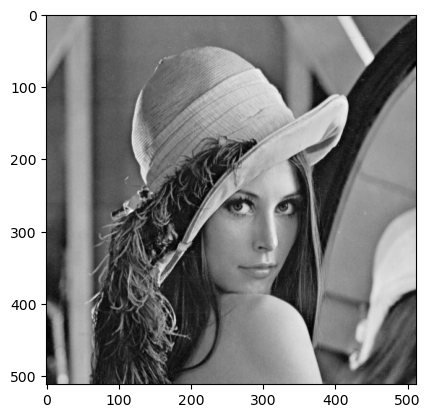

In [19]:
test_img = read_img()
result = cv2.cvtColor(test_img, cv2.COLOR_RGB2GRAY)
plt.imshow(result, cmap='gray')

### 5. Перевести изображение в hsv

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


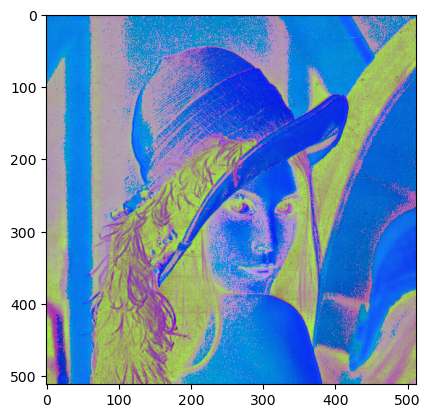

In [17]:
test_img = read_img()
result = cv2.cvtColor(test_img, cv2.COLOR_RGB2HSV)
plt.imshow(result)

### 6. Повернуть изображение на 30 градусов вокруг заданной точки

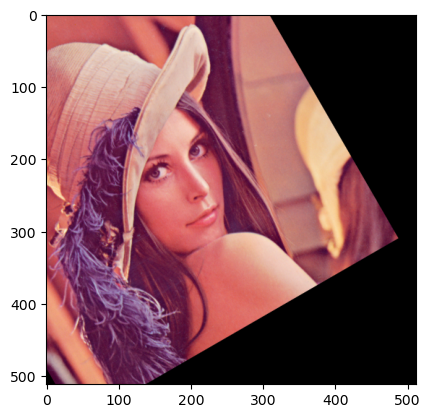

In [22]:
test_img = read_img()
M = cv2.getRotationMatrix2D((123, 456), 30, 1.0)
result = cv2.warpAffine(test_img, M, test_img.shape[:2])
plt.imshow(result)

### 7. Сделать бинаризацию изображения

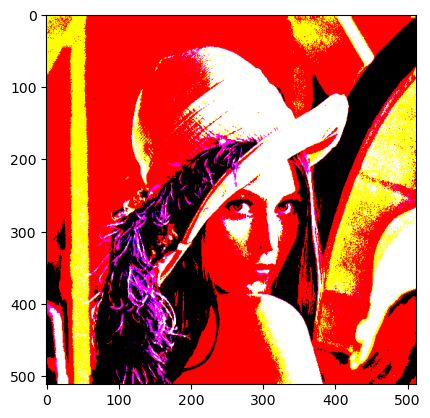

In [24]:
test_img = read_img()
_, result = cv2.threshold(test_img, 128, 255, cv2.THRESH_BINARY)
plt.imshow(result)

### 8. Найти контуры на изображении, применив соответствующие фильтры (фильтр Собеля или Лапласиан)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


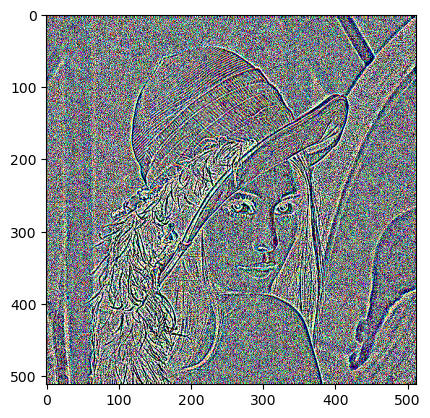

In [26]:
test_img = read_img()
result = cv2.Laplacian(test_img, cv2.CV_64F)
plt.imshow(result)

### 9. Сделать фильтрацию изображения при помощи преобразования Фурье, оставить только медленные частоты

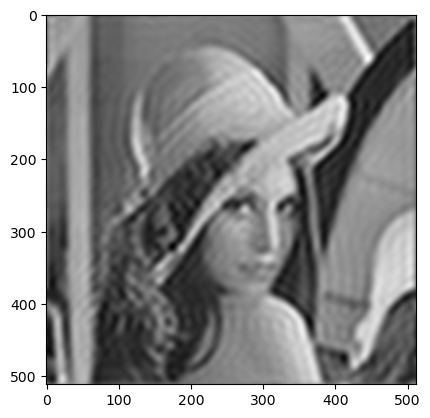

In [47]:
test_img = read_img()
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2GRAY)
dft = cv2.dft(np.float32(test_img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))

rows, cols = test_img.shape[:2]
crow, ccol = rows // 2, cols // 2

mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow - 30:crow + 30, ccol - 30:ccol + 30] = 1

fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
result = cv2.idft(f_ishift)
result = cv2.magnitude(result[:,:,0], result[:,:,1])

plt.imshow(result, cmap='gray')

### 10. Применить операцию диляции к изображению

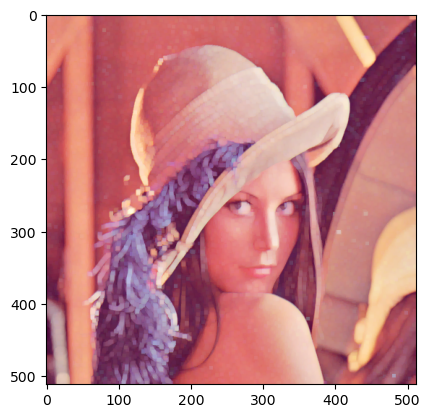

In [51]:
test_img = read_img()
kernel = np.ones((5, 5), np.uint8) 
result = cv2.dilate(test_img, kernel, iterations=1)
plt.imshow(result)